In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Reading in data and dropping headings 

data_path  = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
crimes= pd.read_csv(data_path, header=None)
crimes = crimes.drop([0,1,2,3])

In [3]:
#cleaning the data - will create functions next time 


# changing title of column
crimes['city'] = crimes[0]
crimes['population'] = crimes[1]
crimes['violent\ncrime'] = crimes[2]
crimes['Murder and\nnonnegligent\nmanslaughter'] = crimes[3]
crimes['Rape\n(revised\ndefinition)1'] = crimes[4]
crimes['Rape\n(legacy\ndefinition)2'] = crimes[5]
crimes['Robbery'] = crimes[6]
crimes['Aggravated\nassault'] = crimes[7]
crimes['Property\ncrime'] = crimes[8]
crimes['Burglary'] = crimes[9]
crimes['Larceny-\ntheft'] = crimes[10]
crimes['Motor\nvehicle\ntheft'] = crimes[11]
crimes['Arson3'] = crimes[12]
                        
crimes



,0,1,2,3,4,5,6,7,8,9,...,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,...,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,...,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,...,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,...,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,...,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,...,0,NaN,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,...,0,NaN,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,...,0,NaN,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,...,1,NaN,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,...,0,NaN,2,4,3,210,16,188,6,1


In [4]:
# Removing old col without labels 
crimes = crimes.drop(0,axis=1)
crimes = crimes.drop(1,axis=1)
crimes = crimes.drop(2,axis=1)
crimes = crimes.drop(3,axis=1)
crimes = crimes.drop(4,axis=1)
crimes = crimes.drop(5,axis=1)
crimes = crimes.drop(6,axis=1)
crimes = crimes.drop(7,axis=1)
crimes = crimes.drop(8,axis=1)
crimes = crimes.drop(9,axis=1)
crimes = crimes.drop(10,axis=1)
crimes = crimes.drop(11,axis=1)
crimes = crimes.drop(12,axis=1)
crimes = crimes.drop('Rape\n(revised\ndefinition)1',axis=1)

In [ ]:
crimes

In [5]:
crimes = crimes.drop([4])

In [6]:
#drop missing values 
crimes = crimes.dropna()

In [18]:
# Data cleaning

#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in crimes.columns:
    crimes[col]= crimes[col].apply(lambda x: str(x).replace(',', ''))
    crimes[col]= crimes[col].apply(lambda x: str(x).strip())

#Convert str and objects to float 
numerical_crimes = crimes.columns[1:]
for num_col in numerical_crimes:
    crimes[num_col]= crimes[num_col].apply(lambda x: float(x))

In [19]:
#checkign the types of the columns to make sure they are ready for graphing 
crimes.dtypes


city                                       object
population                                float64
violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


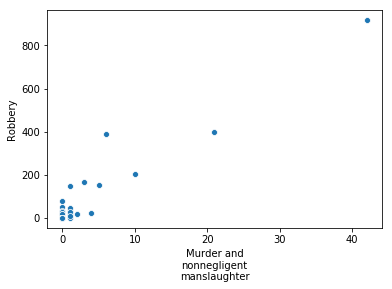

In [15]:
#Visualizing the ataset 
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['Robbery']))


AxesSubplot(0.125,0.125;0.775x0.755)


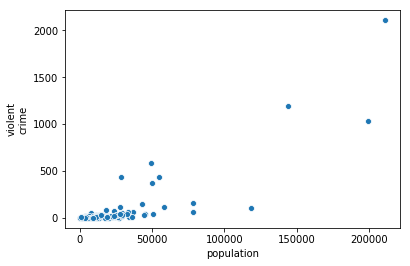

In [14]:
print(sns.scatterplot(x=crimes['population'], y=crimes['violent\ncrime']))


AxesSubplot(0.125,0.125;0.775x0.755)


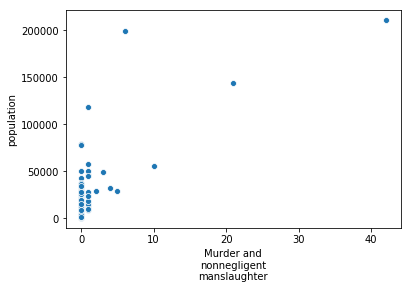

In [17]:
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['population']))
# I will keep the outlying values because they correspond with population  

In [22]:

#Feature Engineering 
crimes['Robbery_conditon'] = crimes['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crimes['Murder_condition'] = crimes['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)

#crimes['Arson/robbery'] = int(crimes['Arson3'])/int(crimes['Robbery'])
#crimes['violentcrime/pop'] = int(crimes['violent crime'])/int(['populations'])
#crimes['nonviolentcrime/pop'] = (int(crimes['property crime']) * int(crimes['Larceny- theft'])*int(crimes['Burglary'])/['populations'])

#featues for model 
#crimes['murder_pop'] = crimes['Murder and\nnonnegligent\nmanslaughter']/crimes['population']
#crimes['Robbery_pop'] = crimes['Robbery'] / crimes['population']
#crimes['murder_robbery'] = crimes['Robbery']/crimes['Murder and\nnonnegligent\nmanslaughter']





